# Exercises

## Exercise 1: explore filter parameters
---
In this exercises you will explore how different parameters affect the filtering process.
- Import the data form `data/moving_lfp.pickle` (the file is already on your machine if you run the `download_data()` cell in the main lesson)
- Take a few seconds of the data, and filter them in different frequency bands. Plot the resulting signal.
  Fix the central frequency and play with the width of the band, then try to change the central frequency of the band.
- Change the order of the filter, keeping the frequency band fixed. How does the filtered signal change? How does the computing time change? (You can try to quantify the computing time with the jupyter magic command [`%timeit`](https://docs.python.org/3/library/timeit.html) )
- Comment on what you see

In [2]:
import pickle
import sys
import os
sys.path.append(os.path.abspath("code"))
print(os.getcwd())

import matplotlib.pyplot as plt
import numpy as np

c:\Users\ptrso\OneDrive\Desktop\MasteRU\Quarter3\NRA\Assignments\LFP


In [3]:
# Download the data
# download_data('https://surfdrive.surf.nl/files/index.php/s/9nY01qMimFLez40')

# Load the data
with open('../../neural-data/01-local_field_potential/data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')
# lfp/1000 is the time in seconds

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


Text(0.5, 1.0, '2 seconds of LFP Signal')

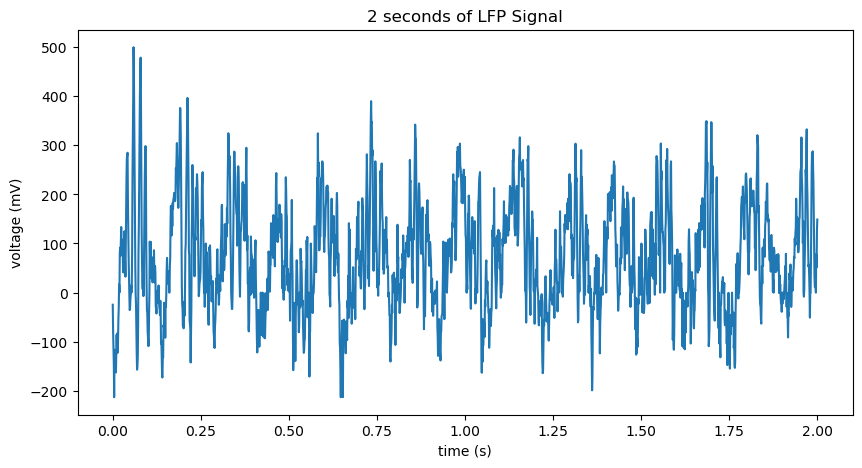

In [4]:
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,2,2000),lfp[:2000]) # 2 seconds = 2000 lfp points
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title("2 seconds of LFP Signal")

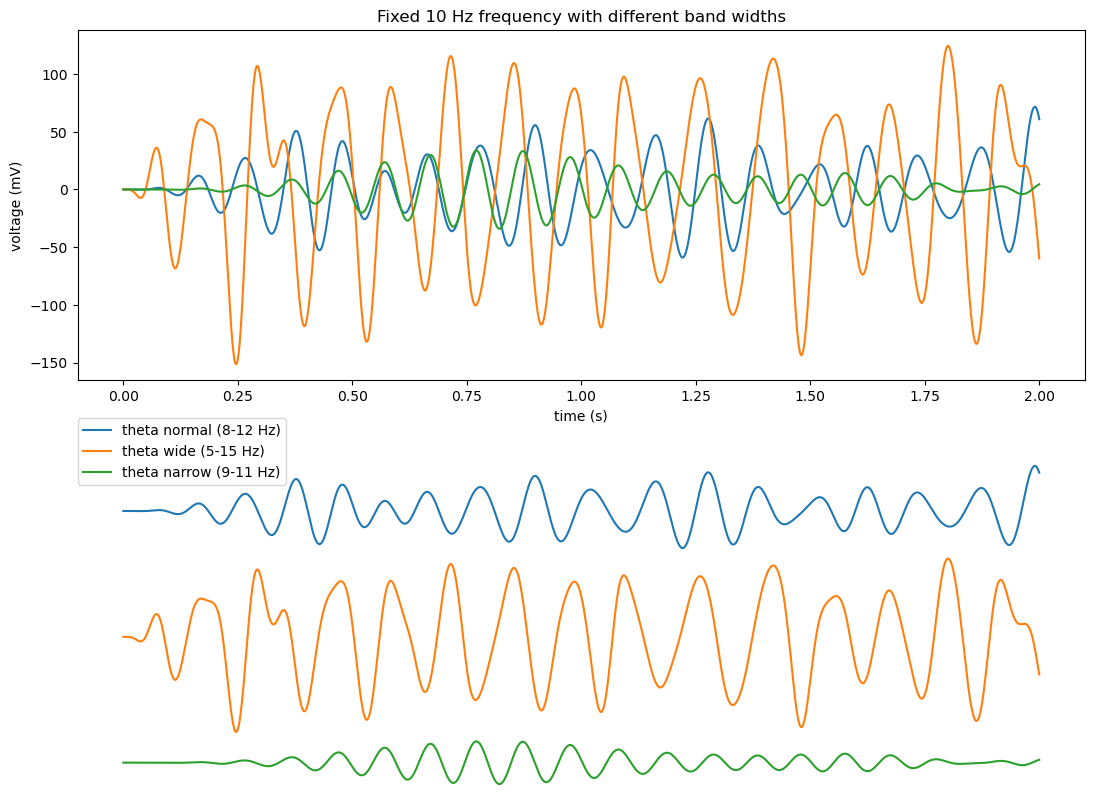

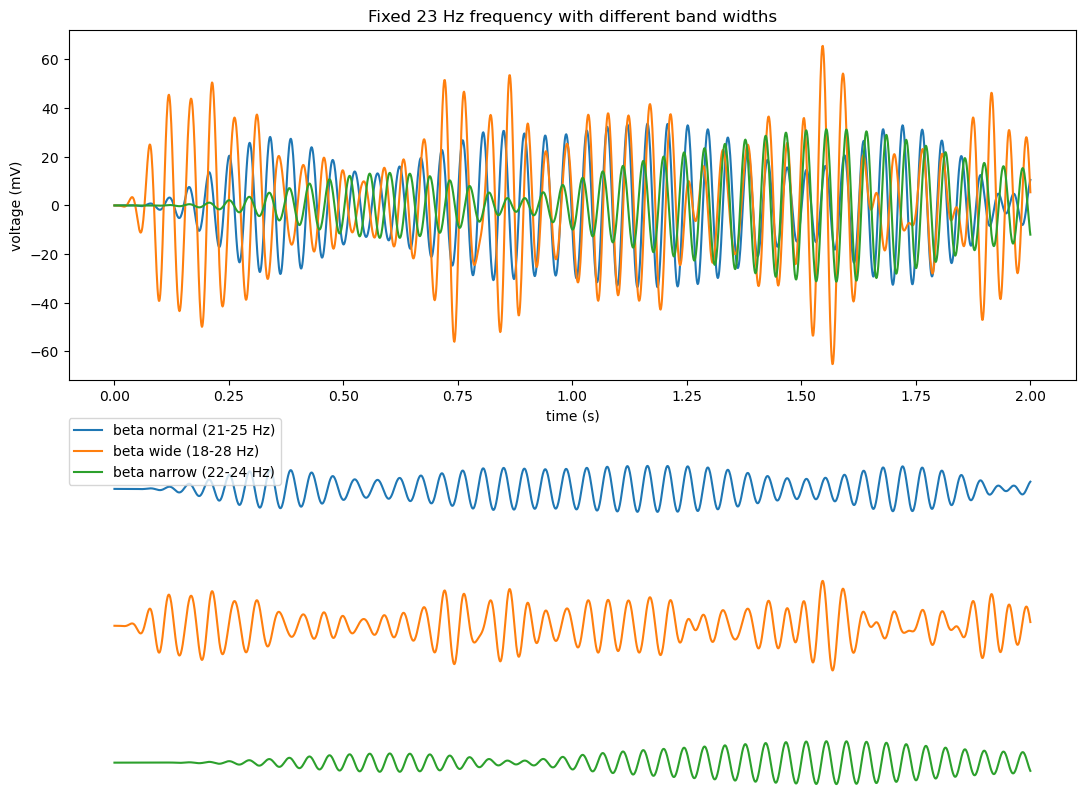

In [9]:
from scipy.signal import butter
from scipy.signal import sosfilt

def bandpass_filter(input, low_f, high_f, sampling_rate=sampling_rate, filter_order=5):
    filter = butter(filter_order,[low_f,high_f],
                    btype='band', 
                    output='sos', 
                    fs=sampling_rate)
                          
    wideband_lfp = sosfilt(filter, input)
    return wideband_lfp

th_lfp_normal = bandpass_filter(lfp,low_f=8,high_f=12, sampling_rate=sampling_rate)
th_lfp_wide = bandpass_filter(lfp,low_f=5,high_f=15, sampling_rate=sampling_rate)
th_lfp_narrow = bandpass_filter(lfp,low_f=9,high_f=11, sampling_rate=sampling_rate)

plot_offset = 200 # to plot the signal on different lines
x = np.linspace(0,2,2000)  # x-axis for 2 seconds of data

plt.figure(figsize=(13, 10))

# First subplot
plt.subplot(2, 1, 1)
plt.plot(x, th_lfp_normal[:2000], label='theta normal (8-12 Hz)')
plt.plot(x, th_lfp_wide[:2000], label='theta wide (5-15 Hz)')
plt.plot(x, th_lfp_narrow[:2000], label='theta narrow (9-11 Hz)')
plt.ylabel('voltage (mV)')
plt.xlabel('time (s)')
plt.title("Fixed 10 Hz frequency with different band widths")

# Second subplot
plt.subplot(2, 1, 2)
plt.plot(x, th_lfp_normal[:2000]+2*plot_offset, label='theta normal (8-12 Hz)')
plt.plot(x, th_lfp_wide[:2000]+plot_offset, label='theta wide (5-15 Hz)')
plt.plot(x, th_lfp_narrow[:2000], label='theta narrow (9-11 Hz)')
plt.legend(loc=(0, 0.9))
plt.axis('off')


# Changing the bandpass filter to beta frequencies 
b_lfp_normal = bandpass_filter(lfp,low_f=21,high_f=25, sampling_rate=sampling_rate)
b_lfp_wide = bandpass_filter(lfp,low_f=18,high_f=28, sampling_rate=sampling_rate)
b_lfp_narrow = bandpass_filter(lfp,low_f=22,high_f=24, sampling_rate=sampling_rate)

plt.figure(figsize=(13, 10))

plt.subplot(2, 1, 1)
plt.plot(x, b_lfp_normal[:2000], label='beta normal (21-25 Hz)')
plt.plot(x, b_lfp_wide[:2000], label='beta wide (18-28 Hz)')
plt.plot(x, b_lfp_narrow[:2000], label='beta narrow (22-24 Hz)')
plt.ylabel('voltage (mV)')
plt.xlabel('time (s)')
plt.title("Fixed 23 Hz frequency with different band widths")

plt.subplot(2, 1, 2)
plt.plot(x, b_lfp_normal[:2000]+2*plot_offset, label='beta normal (21-25 Hz)')
plt.plot(x, b_lfp_wide[:2000]+plot_offset, label='beta wide (18-28 Hz)')   
plt.plot(x, b_lfp_narrow[:2000], label='beta narrow (22-24 Hz)')
plt.axis('off')
plt.legend(loc=(0,0.9))

From the first plot we can observe when the band is wider it takes into consideration more frequency components around the central fixed frequency. This increases the overall amplitude but decreasing how precise it is in capturing the theta frequency. The same can be observed for the 23 Hz frequency in the beta region. 

As for the effect of the change of the central frequency, we can say that because the beta rythm has higher frequency oscillations, changes in bandwdith can affect the clarity significantly. For a narrow high frequency band though like the 23 Hz rythm, the signal is relatively clear.

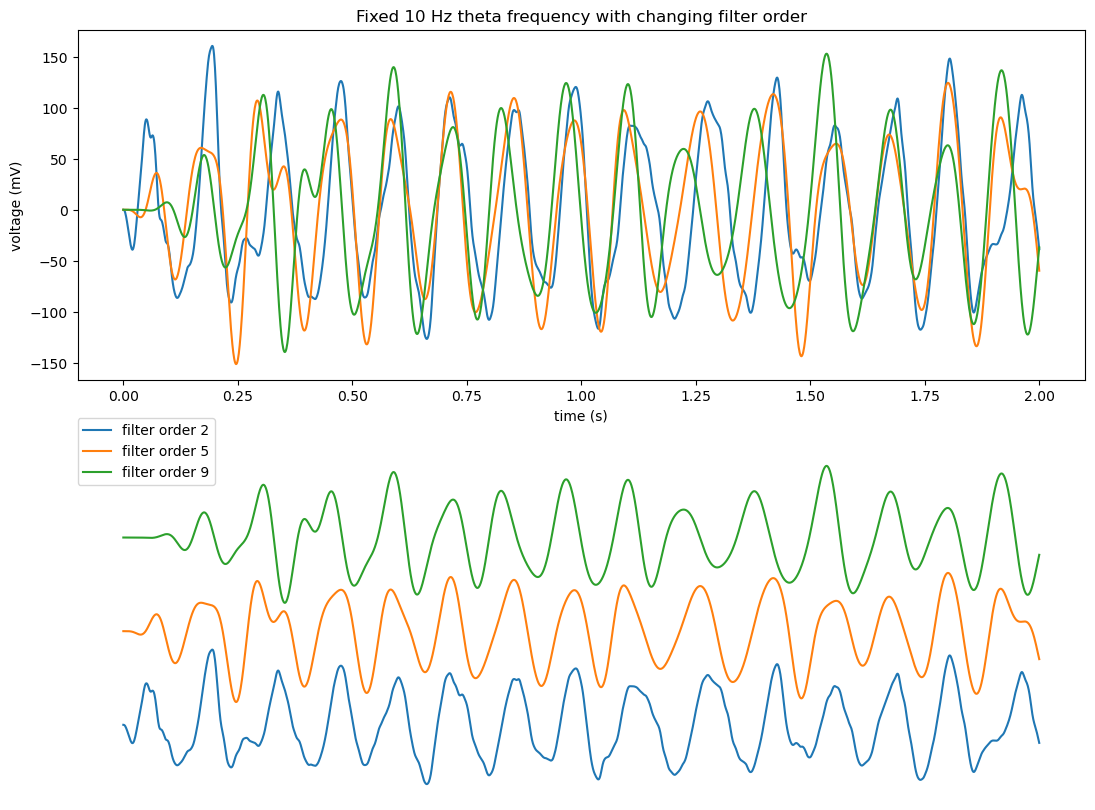

In [6]:
filter_orders = [2, 5, 9]
plot_offset = 200 # to plot the signal on different lines
x = np.linspace(0,2,2000)  
plt.figure(figsize=(13, 10))

for idx, ord in enumerate(filter_orders):
    th_lfp_ord = bandpass_filter(lfp, low_f=5, high_f=15, filter_order=ord)

    plt.subplot(2, 1, 1)
    plt.plot(x, th_lfp_ord[:2000], label='filter order %d' % ord)
    plt.subplot(2, 1, 2)
    plt.plot(x, th_lfp_ord[:2000] + idx * plot_offset, label='filter order %d' % ord)

plt.subplot(2, 1, 1)
plt.ylabel('voltage (mV)')
plt.xlabel('time (s)')
plt.title("Fixed 10 Hz theta frequency with changing filter order")

plt.subplot(2, 1, 2)
plt.axis('off')
plt.legend(loc=(0, 0.9))

In [7]:
for ord in filter_orders:
    print(f"Filter order {ord}:")
    %timeit bandpass_filter(lfp, low_f=8, high_f=12, filter_order=ord)


Filter order 2:
6.39 ms ± 368 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Filter order 5:
9.13 ms ± 554 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Filter order 9:
14.9 ms ± 484 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


For low filter order (example 2nd order) the signal is less smooth and shows slight distortions, especially at transitions. The oscillatory pattern is present but looks messier and noisier. The higher the filter order the smoother and more consistent the signal becomes. For a really high filter order some phase distortion may be observed in the form of delays of the peaks.

For the factor of computational time as it is expected, as the filter order increases, the computation time increases as well. This is because higher-order filters involve more complex calculations and longer convolution processes.

In [8]:
# from scipy.fft import fft, fftfreq

# n_samples = len(lfp)
# print(f"Number of samples: {n_samples}")
# # print(lfp[:10], lfp[-10:])
# sample_dt = 1/sampling_rate

# centered_lfp = lfp - np.mean(lfp)

# # FFT
# fft_lfp = fft(centered_lfp)[:n_samples//2]
# freqs = fftfreq(n_samples, sample_dt)[:n_samples//2]

# power = abs(fft_lfp)**2

# plt.figure(figsize = (10,5))
# plt.plot(freqs, power)
# plt.xlim([0,100]) # restrict to 
# plt.axvline(x=8 ,c='r',linestyle='--',label='8 Hz theta')
# plt.axvline(x=50 ,c='grey',linestyle='--',label='50 Hz electrical noise')
# plt.legend()
# plt.title("Power Spectrum")
